# Babby's Fourth Neural Net

This example is stolen straight from https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2024-01-17 19:50:29.113224: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 19:50:29.170321: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-17 19:50:29.170379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-17 19:50:29.173012: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-17 19:50:29.182449: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 19:50:29.183658: I tensorflow/core/platform/cpu_feature_guard.cc:1

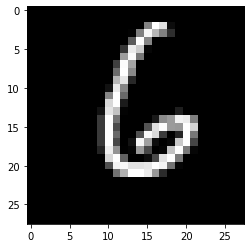

6


In [2]:
def show_datapoint(n):
    plt.imshow(x_train[n], cmap='gray')
    plt.show()
    print(y_train[n])

show_datapoint(32)

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2972 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1419 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1063 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0869 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0751 - accuracy: 0.9764


In [7]:
model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9773


[0.07486946135759354, 0.9772999882698059]

In [30]:
img = tf.keras.utils.load_img('handdrawn.bmp', color_mode='grayscale')
input_array = tf.reshape(tf.keras.utils.img_to_array(img),(1,28,28))
img

In [31]:
model(input_array)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -5457.9497,  -6659.4326,   5643.103 ,   5034.4556, -24216.918 ,
          3956.2817,  -3115.0068,   3565.6533,  -8385.755 , -14462.488 ]],
      dtype=float32)>

In [13]:
def make_prediction():
    img = tf.keras.utils.load_img('handdrawn.bmp', color_mode='grayscale')
    input_array = tf.reshape(tf.keras.utils.img_to_array(img),(1,28,28))
    print(tf.argmax(model(input_array),axis=1).numpy()[0])

In [34]:
make_prediction()

3
